**Exam number**: Y3902375

**Module code and assignment number**: PHY00009M Assignment 1 (Final Assignment)

**Number of pages in pdf**: TBD

# Statistical Methods and Data Analysis

# 1.a

In [2]:
import matplotlib.pyplot as plt # For plotting
import numpy as np # For mathematics, relevant data structure operations, etc.

# Represent the data given in question
time = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
distance = np.array([12., 40, 62, 78, 96, 120])

# Print the values as confirmation
print("time =",time)

print("distance =",distance)

time = [1. 2. 3. 4. 5. 6.]
distance = [ 12.  40.  62.  78.  96. 120.]


**Plot of data**

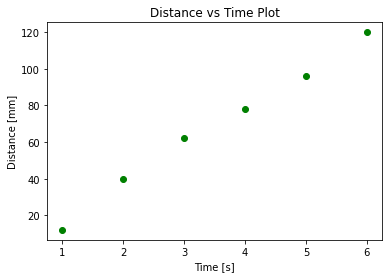

In [3]:
plt.title('Distance vs Time Plot')
plt.xlabel('Time [s]')
plt.ylabel('Distance [mm]')
plt.plot(time, distance, 'o', color='green')

**Equation to estimate trolley speeds**

Since the question says that the speed is constant, the distance would be simply the unknown speed multiplied by time, from basic kinematics.

$ distance = {speed}\times {time} + distance_{initial} $

This is essentially a linear function of time (commonly denoted in general linear functions as $x$), with speed being the slope (commonly denoted as $m$) and the initial distance being the constant offset (commonly denoted as $c$).

**Necessity of zeroth order**

Given how the question says that the trolley passes through reference for distance measurement ($d=0$) at exactly time $t=0$, the zeroth order term, or the offset, is not required